
#### Data Collection and preprocessing 


In [3]:
import tweepy
import csv
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/GD/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
#### Twitter API access tokens ( https://apps.twitter.com/ )
## How we got data from twitter
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_token_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('Fifa.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search,q=("#threelions","ItsComingHome","itscominghome","@england"),count=1000,
                           lang="en",
                           since="2015-01-01").items():
    #print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.decode('utf-8')])
col_Names = ["Date","text"]
dataset = pd.read_csv('Fifa.csv',names = col_Names)


In [8]:
wc_df = pd.read_csv("https://raw.githubusercontent.com/solaojp/DATA-620/master/Fifareload.csv", header=None, encoding='utf-8')

In [9]:
wc_df.head()

,0,1,2
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN


In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
wc_df.columns = ['datetime','tweet','sentiments']

In [12]:
wc_df['sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in wc_df['tweet']]

In [13]:
wc_df.head()


,datetime,tweet,sentiments,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,NaN,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",NaN,-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,NaN,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,NaN,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,NaN,0.0000


In [14]:
del wc_df["sentiments"]

In [15]:
wc_df.head()

,datetime,tweet,sentiment
0,7/13/18 18:42,b'Any word on who won the Sham Fight this year...,0.2732
1,7/13/18 18:42,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,7/13/18 18:39,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,7/13/18 18:39,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,7/13/18 18:39,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


In [16]:
del wc_df["datetime"]

In [17]:
wc_df.head()

,tweet,sentiment
0,b'Any word on who won the Sham Fight this year...,0.2732
1,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229
2,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000
3,b'RT @kkdhaliwal_: Sikh family wedding. I bloo...,0.3182
4,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000


In [18]:
## Text length
##As a way of sanity check, let’s look at the length of the string in text column in each entry.
wc_df['pre_clean_len'] = [len(t) for t in wc_df.tweet]

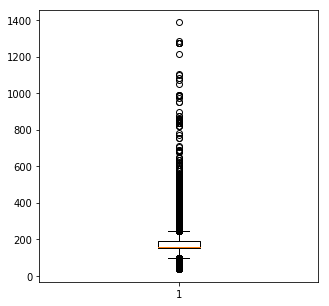

In [19]:
## Box plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(wc_df.pre_clean_len)
plt.show()

"This looks a bit strange, since the twitter’s character limit is 140. But from the above box plot, some of the tweets are way more than 140 characters long."

In [20]:
wc_df[wc_df.pre_clean_len > 140].head(10)

,tweet,sentiment,pre_clean_len
1,"b""I'M REALLY SORRY! I WANTED TO KEEP THE TOGET...",-0.3229,141
2,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000,155
4,b'@GaryLineker @sidlowe Can\xe2\x80\x99t wait ...,0.0000,163
5,"b""RT @aufwiedpet: Barry Taylor demonstrates hi...",0.0000,154
6,"b'RT @UnitedOddsocks: Treat Tuesdays! FOLLOW, ...",0.9065,176
7,b'RT @superpidge: Just heard my neighbour sing...,0.5106,175
8,b'RT @livuniTechDirec: So proud to collect the...,0.8687,154
10,b'RT @littlejetco: Two departures this morning...,0.1511,154
15,"b'RT @RunningWomanUK: Use promo code ""itscomin...",0.0000,155
16,b'RT @ledu_tokens: We\xe2\x80\x99re finalizing...,0.0000,165


In [21]:
## Data Preaparation: (Cleaning tweets)
1 HTML Encoding
2 @mentions
3 URL Links
4 UTF-8 encoding 
 

SyntaxError: invalid syntax (<ipython-input-21-89ef42ec362a>, line 2)

In [22]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(tweet):
    soup = BeautifulSoup(tweet, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()    

In [23]:
import numpy as np
nums = [0,18042]
print("Cleaning and parsing the tweet...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%1000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
        clean_tweet_texts.append(tweet_cleaner(wc_df['tweet'][i]))

Cleaning and parsing the tweet...

Tweets 1000 of 18042 has been processed
Tweets 2000 of 18042 has been processed
Tweets 3000 of 18042 has been processed
Tweets 4000 of 18042 has been processed
Tweets 5000 of 18042 has been processed
Tweets 6000 of 18042 has been processed
Tweets 7000 of 18042 has been processed
Tweets 8000 of 18042 has been processed
Tweets 9000 of 18042 has been processed
Tweets 10000 of 18042 has been processed
Tweets 11000 of 18042 has been processed
Tweets 12000 of 18042 has been processed
Tweets 13000 of 18042 has been processed
Tweets 14000 of 18042 has been processed
Tweets 15000 of 18042 has been processed
Tweets 16000 of 18042 has been processed
Tweets 17000 of 18042 has been processed
Tweets 18000 of 18042 has been processed


In [24]:
def tweet_re(tweet):
    str1 = ''.join(clean_tweet_texts)
    str1 = str1.split()
    nowords = ['xa','xe','xef','xbd','nbea','xf','xb','nthe','nhs','xbf','xart','xae','xaxf','itscominghome','threelions','england','xafor','xacro','hyde','park','london']
    resultwords  = [word for word in str1 if word not in nowords]
    return (" ".join(resultwords)).strip()

In [25]:
nums = [0,18042]
print("Cleaning and parsing the tweet...\n")
clean_tweet_text = []
for i in range(nums[0],nums[1]):
    if( (i+1)%1000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
        clean_tweet_text.append(tweet_re(wc_df['tweet'][i]))

Cleaning and parsing the tweet...

Tweets 1000 of 18042 has been processed
Tweets 2000 of 18042 has been processed
Tweets 3000 of 18042 has been processed
Tweets 4000 of 18042 has been processed
Tweets 5000 of 18042 has been processed
Tweets 6000 of 18042 has been processed
Tweets 7000 of 18042 has been processed
Tweets 8000 of 18042 has been processed
Tweets 9000 of 18042 has been processed
Tweets 10000 of 18042 has been processed
Tweets 11000 of 18042 has been processed
Tweets 12000 of 18042 has been processed
Tweets 13000 of 18042 has been processed
Tweets 14000 of 18042 has been processed
Tweets 15000 of 18042 has been processed
Tweets 16000 of 18042 has been processed
Tweets 17000 of 18042 has been processed
Tweets 18000 of 18042 has been processed


In [26]:
clean_df = pd.DataFrame(clean_tweet_text,columns=['tweet'])
clean_df['sentiment'] = wc_df.sentiment
clean_df.to_csv('clean_tweet.csv')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.info()
my_df['sentiment'].describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
tweet        18 non-null object
sentiment    18 non-null float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


<bound method NDFrame.describe of 0     0.2732
1    -0.3229
2     0.0000
3     0.3182
4     0.0000
5     0.0000
6     0.9065
7     0.5106
8     0.8687
9     0.1531
10    0.1511
11    0.8176
12    0.0000
13    0.6800
14    0.1531
15    0.0000
16    0.0000
17    0.0000
Name: sentiment, dtype: float64>

In [27]:
## Dataframe shows no null entries.we can proceed further

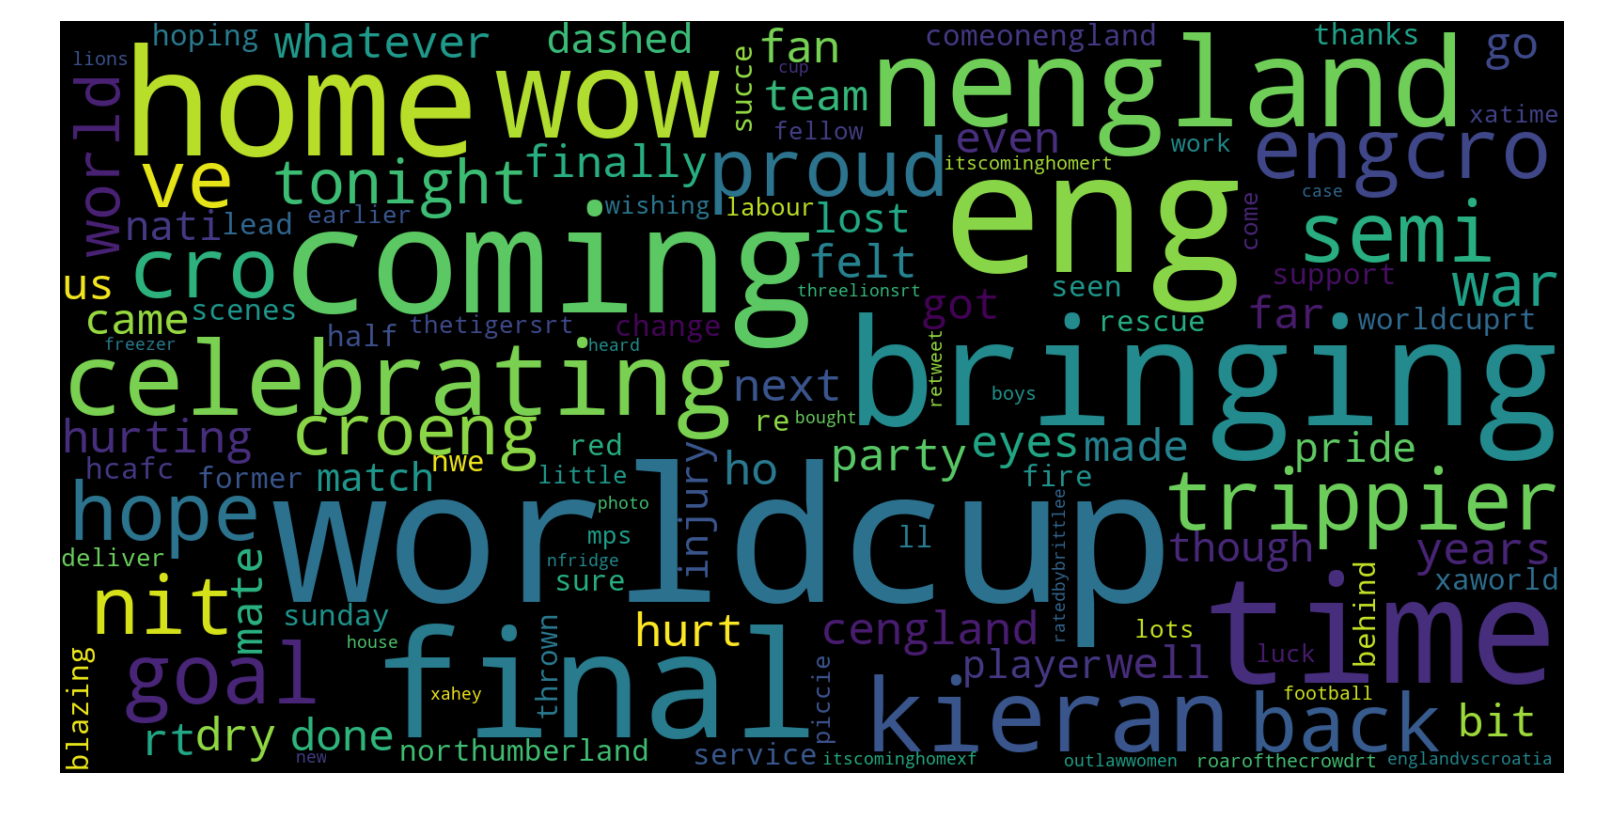

In [28]:
pos_tweets = my_df[(my_df.sentiment > 0.9)]
pos_string = []
for t in pos_tweets.tweet:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()